Nick Azzarano CSCI 335 03
Anton Selitskiy
February 24, 2025

# Homework 4: Text Classification

In this homework, you will work with a dataset composed of the posts from Tweetter. The goal is to identify if there is an emergency information in the tweet or not. This is a binary classification task.

\

We will use a dataset from Kaggle contest: https://www.kaggle.com/competitions/nlp-getting-started/data Download train.csv file (test.csv files in competitions typically do not have labels available, only organizers know them and use to validate the submissions). The code below will split the first file into train and validation sets.

*In case you don't want to register on Kaggle or use your gmail account, sent me e-mail and I'll send you the dataset*

In [92]:
import pandas as pd

The train.csv file was manually uploaded to my own notebook. You might have to do the same when grading.

In [93]:
data = pd.read_csv('train.csv')

In [94]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Q1 (1pt)

Print information about missing values. Fill in missing values with an empty string [Example in SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/2025_spring/Week04_SGD/ML7.ipynb) in ceaning of the Automobiles dataset.

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [96]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [97]:
data.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [98]:
for column in data.columns:
    data[column].fillna('', inplace=True)

<ipython-input-98-d70cccf88a31>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna('', inplace=True)


In [99]:
data.isnull().sum()

,0
id,0
keyword,0
location,0
text,0
target,0


In [100]:
data.head()

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1


Now we will split our data into Test, Validation, and Test sets. You don't want to use Test set untill Q10.

In [101]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(data, test_size=0.3, random_state=42)

In [102]:
validation, test = train_test_split(validation, test_size=0.4, random_state=42)

## Q2 (2pt)

1. What is the distribution of the classes in the Training set? (Count the fractions of classes, to understand if they are balanced or not.)

2. Plot the bar-plot for 10 mostly frequent values in the column "keyword".

Comment on the information you've seen.

In [103]:
train['target'].value_counts()

,count
target,
0,3024
1,2305


They don't seem balanced.

<Axes: xlabel='keyword'>

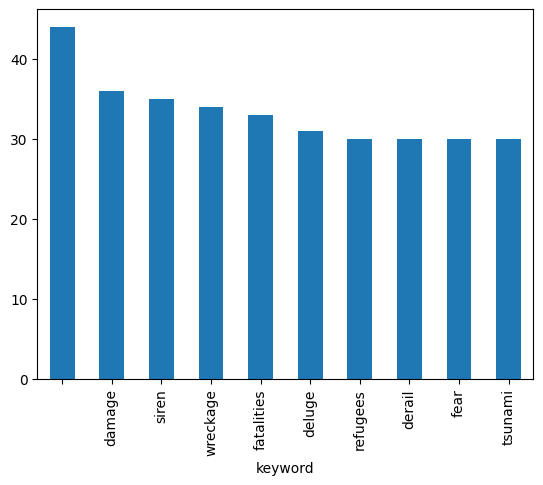

In [104]:
# Plot the bar-plot for 10 mostly frequent values in the column "keyword"
train['keyword'].value_counts().head(10).plot(kind='bar')

The empty string is now the most common value in the "keywords" column.

## Q3 (1pt)

Join text columns in a new column and delete the column with id.

In [105]:
# Join text columns keyword, location and text in a new single column and delete the column with id
train['text'] = train['keyword'] + ' ' + train['location'] + ' ' + train['text']
train = train.drop(['id', 'keyword', 'location'], axis=1)

In [106]:
train.head()

,text,target
1186,bridge%20collapse Ashes 2015: AustraliaÛªs c...,0
4071,"hail Carol Stream, Illinois GREAT MICHIGAN TEC...",1
5461,police Houston CNN: Tennessee movie theater s...,1
5787,rioting Still rioting in a couple of hours le...,1
7445,wounds Lake Highlands Crack in the path where ...,0


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5329 entries, 1186 to 7270
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5329 non-null   object
 1   target  5329 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.9+ KB


## Q4 (1pt)

Work with train set.

1. Transform the data using CountVectorizer.
2. What is the shape of the resulted matrix?


In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
countv = CountVectorizer()

In [110]:
# Transform the data using CountVectorizer.
X_train = countv.fit_transform(train['text'])

In [111]:
# What is the shape of the resulted matrix?
X_train.shape

(5329, 18455)

In [112]:
countv.get_feature_names_out()

array(['00', '000', '0000', ..., 'ûóher', 'ûókody', 'ûótech'],
      dtype=object)

## Q5 (2pt)

The matrix in the previous question has many columns. Let's take a look at the dictionary of tokens, method *.vocabulary_* of CountVectorizer object.

1. Find all the words in this dictionary that contain digits. How many such words were found?

2. Find all the words that contain punctuation characters. How many such words were found?

In [113]:
import re

In [114]:
countv.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18425,
 'collapse': 3914,
 'at': 1977,
 'trent': 16483,
 'among': 1628,
 'worst': 17813,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11995,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15733,
 'hail': 7420,
 'carol': 3363,
 'stream': 15419,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15888,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16013,
 'to': 16272,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15949,
 'goblue': 7088,
 'wrestleon': 17848,
 'oaskgki6qj': 11648,
 'police': 12634,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15932,
 'movie': 10940,
 'theater': 16025,
 'shooting': 14647,
 'suspect': 15632,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13800,
 'still': 15357,
 'couple': 4204,
 'of': 11708,
 'hours': 7925,
 'left': 9644,
 'until': 16884,
 'have': 7546,
 'be': 2383,
 'up': 

In [115]:
# Find all the words in this dictionary that contain digits. How many such words were found?
count = 0
for word in countv.vocabulary_:
    if re.search(r'\d', word):
        count += 1
print("Number of words that contain digits:")
print(count)

Number of words that contain digits:
3812


In [116]:
# Find all the words that contain punctuation characters. Make sure to consider apostrophes.
# How many such words were found?
count = 0
for word in countv.vocabulary_:
    if re.search(r'[^\w\s]', word):
        count += 1
print("Number of words that contain punctuation characters:")
print(count)

Number of words that contain punctuation characters:
0


## Q6 (1pt)

During the lecture, we learned that there is a special text tokenizer in NLTK called *TweetTokenizer.* Let's try to apply *CountVectorizer* with this tokenizer. Answer all the questions from the previous section using TweetTokenizer and compare the results.

In [117]:
from nltk.tokenize import TweetTokenizer

In [118]:
tweetTokenizer = TweetTokenizer()

In [119]:
# Transform the data using TweetTokenizer.
countv2 = CountVectorizer(tokenizer=tweetTokenizer.tokenize)
X_train2 = countv2.fit_transform(train['text'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [120]:
countv2.get_feature_names_out()

array(['!', '#', '##youtube', ..., 'ûóher', 'ûókody', 'ûótech'],
      dtype=object)

In [121]:
countv2.vocabulary_

{'bridge': 5275,
 '%': 1472,
 '20collapse': 1800,
 'ashes': 4530,
 '2015': 1773,
 ':': 2229,
 'australia': 4628,
 '\x89': 19587,
 'ûªs': 19640,
 'collapse': 6032,
 'at': 4567,
 'trent': 18450,
 'among': 4300,
 'worst': 19368,
 'in': 12552,
 'history': 8949,
 'england': 7415,
 'bundled': 5388,
 'out': 14999,
 'for': 8041,
 '60': 2077,
 '...': 1512,
 'http://t.co/t5trhjuau0': 11456,
 'hail': 8661,
 'carol': 5600,
 'stream': 17648,
 ',': 1483,
 'illinois': 12503,
 'great': 8518,
 'michigan': 14071,
 'technique': 18025,
 'camp': 5510,
 'b1g': 4691,
 'thanks': 18124,
 'to': 18284,
 '@bmurph1019': 2490,
 '@hail_youtsey': 2905,
 '.': 1509,
 '@termn8r13': 3718,
 '#goblue': 520,
 '#wrestleon': 1442,
 'http://t.co/oaskgki6qj': 10996,
 'police': 15494,
 'houston': 9082,
 'cnn': 5982,
 'tennessee': 18063,
 'movie': 14348,
 'theater': 18131,
 'shooting': 17007,
 'suspect': 17851,
 'killed': 13124,
 'by': 5442,
 'http://t.co/di8elzswnr': 9897,
 'rioting': 16377,
 'still': 17597,
 'a': 3943,
 'couple

In [122]:
# Find all the words in this dictionary that contain digits. How many such words were found?
count = 0
for word in countv2.vocabulary_:
    if re.search(r'\d', word):
        count += 1
print("Number of words that contain digits:")
print(count)

Number of words that contain digits:
3939


In [123]:
# Find all the words that contain punctuation characters. Make sure to consider apostrophes.
# How many such words were found?
count = 0
for word in countv2.vocabulary_:
    if re.search(r'[^\w\s]', word):
        count += 1
print("Number of words that contain punctuation characters:")
print(count)

Number of words that contain punctuation characters:
7312


## Q7 (4pt)

In scikit-learn, we can evaluate the process of counting matrices using CountVectorizer. CountVectorizer, like other inheritors of the _VectorizerMixin, has arguments tokenizer and preprocessor. The preprocessor is applied at the very beginning to each line of your dataset, while the tokenizer takes a string and returns tokens.

Let's write a custom tokenizer that will do everything we need:

1. Convert all letters to lowercase.
2. Split the text into tokens using *TweetTokenizer* from the *nltk* package.
3. Remove all tokens that contain non-Latin characters, except for emojies (we'll consider tokens containing only punctuation and at least one parenthesis as emoticons) and hashtags that contain only Latin letters after the initial #.
4. Remove all tokens listed in nltk.corpus.stopwords.words('english').
5. Perform stemming using *SnowballStemmer.*

Demonstrate the operation of your function on the first text in the training dataset. You can access it by *.iloc[0]*

Usefull site on regular expressions: https://regex101.com/

In [124]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [125]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [126]:
stemmer = SnowballStemmer('english')

In [127]:
stop_words = set(stopwords.words("english"))

In [128]:
def custom_tokenizer(text):
    # Lowercase transformation
    text = text.lower()

    # Tokenize using TweetTokenizer
    tokens = tweetTokenizer.tokenize(text)

    # Regular expressions for filtering criteria
    latin_only_regex = re.compile(r'^[a-zA-Z]+$')  # Latin letters only
    hashtag_regex = re.compile(r'^#[a-zA-Z]+$')    # Hashtags with only Latin letters after #
    emoticon_regex = re.compile(r'^[\W]+(?=.*[()])$')  # Only punctuation but includes at least one parenthesis

    # Filter tokens based on criteria
    filtered_tokens = []
    for token in tokens:
        if latin_only_regex.match(token) or hashtag_regex.match(token) or emoticon_regex.match(token):
            filtered_tokens.append(token)




    # Remove stopwords
    filtered_tokens = [token for token in filtered_tokens if token not in stopwords.words('english')]

    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

In [129]:
print(train.iloc[0]['text'])

bridge%20collapse  Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0


In [130]:
custom_tokenizer(train.iloc[0]['text'])

['bridg',
 'ash',
 'australia',
 'collaps',
 'trent',
 'bridg',
 'among',
 'worst',
 'histori',
 'england',
 'bundl',
 'australia']

## Q8 (2pt)

1. Apply *CountVectorizer* with your tokenizer to the Train and Validation sets.
2. Train *LogisticRegression* on the features obtained.
3. Calculate f1-score on the validation set.

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [132]:
# Apply CountVectorizer with your tokenizer to the Train and Validation sets.
countv3 = CountVectorizer(tokenizer=custom_tokenizer)
X_train3 = countv3.fit_transform(train['text'])
X_validation = countv3.transform(validation['text'])

In [133]:
# Train LogisticRegression on the features obtained.
logreg = LogisticRegression()
logreg.fit(X_train3, train['target'])

LogisticRegression()

In [134]:
# Calculate f1-score on the validation set.
y_pred = logreg.predict(X_validation)
f1_score(validation['target'], y_pred)

0.7090719499478624

In [135]:
X_train3.shape

(5329, 10470)

In [136]:
X_validation.shape

(1370, 10470)

## Q9 (2pt)

1. Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?

2. We can further reduce the size of our matrix by discarding *df* values close to one. Most likely, such words do not carry much information about the category since they occur quite frequently. Limit the maximum df in the parameters of TfIdfVectorizer, set the upper limit to 0.9. How did the matrix size change, and how did the quality change?

3. We can also reduce the size of the matrix by removing words with very small *df* values. Were you able to improve the quality by doing this?

For example, min_df = 5 means ignore words that appear less than in 5 documents.

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [138]:
TfidfVectorizer = TfidfVectorizer()

**1)** Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?

In [139]:
# Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?
X_train4 = TfidfVectorizer.fit_transform(train['text'])
X_validation2 = TfidfVectorizer.transform(validation['text'])

In [140]:
# Train LogisticRegression on the features obtained.
logreg2 = LogisticRegression()
logreg2.fit(X_train4, train['target'])

LogisticRegression()

In [141]:
# Calculate f1-score on the validation set.
y_pred2 = logreg2.predict(X_validation2)
f1_score(validation['target'], y_pred2)

0.7420560747663552

In [142]:
X_train4.shape

(5329, 18455)

In [143]:
X_validation2.shape

(1370, 18455)

How did the quality change?


---


The f1 score improved!

.


---



**2)** We can further reduce the size of our matrix by discarding df values close to one. Most likely, such words do not carry much information about the category since they occur quite frequently. Limit the maximum df in the parameters of TfIdfVectorizer, set the upper limit to 0.9. How did the matrix size change, and how did the quality change?

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
TfidfVectorizer2 = TfidfVectorizer(max_df=0.9)

In [146]:
X_train5 = TfidfVectorizer2.fit_transform(train['text'])
X_validation3 = TfidfVectorizer2.transform(validation['text'])

In [147]:
# Train LogisticRegression on the features obtained.
logreg3 = LogisticRegression()
logreg3.fit(X_train5, train['target'])

LogisticRegression()

In [148]:
# Calculate f1-score on the validation set.
y_pred3 = logreg3.predict(X_validation3)
f1_score(validation['target'], y_pred3)

0.7420560747663552

In [149]:
X_train5.shape

(5329, 18455)

In [150]:
X_validation3.shape

(1370, 18455)

How did the matrix size change, and how did the quality change?


---

I did not see any change in the size of the matrix, and the f1 score is the same as when we didn't use max_df = 0.9.


 .


---



3) We can also reduce the size of the matrix by removing words with very small df values. Were you able to improve the quality by doing this?

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [152]:
TfidfVectorizer3 = TfidfVectorizer(min_df=5)

In [153]:
X_train6 = TfidfVectorizer2.fit_transform(train['text'])
X_validation4 = TfidfVectorizer2.transform(validation['text'])

In [154]:
# Train LogisticRegression on the features obtained.
logreg4 = LogisticRegression()
logreg4.fit(X_train5, train['target'])

LogisticRegression()

In [155]:
# Calculate f1-score on the validation set.
y_pred4 = logreg4.predict(X_validation4)
f1_score(validation['target'], y_pred4)

0.7420560747663552

In [156]:
X_train6.shape

(5329, 18455)

In [157]:
X_validation3.shape

(1370, 18455)

Were you able to improve the quality by doing this?


---
The quality of the f1 score is **still** the same, and the shape of the matrices is also the same.


## Q10 (2pt)

Evaluate the best model. The minimal value of f1-score on the Test data should be at least 0.75.

In [158]:
# Evaluate the best model. The minimal value of f1-score on the Test data should be at least 0.75.

In [159]:
test.head()

,id,keyword,location,text,target
6334,9055,structural%20failure,,@SirTitan45 Mega mood swing on a 24 hr schedu...,0
3892,5534,flattened,"Wahpeton, ND",Picking up flattened hay men (@ Masonite in Wa...,0
2662,3824,detonate,Worldwide,52.214904 5.139055 Nuke please. Target Hilvers...,1
5378,7675,panic,"Elsewhere, NZ",Lose bus card.\nPanic.\nKind bus driver.\nRepl...,0
7561,10810,wrecked,6,@Tunes_WGG lol. U got wrecked,0


In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 6334 to 5428
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        914 non-null    int64 
 1   keyword   914 non-null    object
 2   location  914 non-null    object
 3   text      914 non-null    object
 4   target    914 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 42.8+ KB


In [161]:
test.isnull().sum()

,0
id,0
keyword,0
location,0
text,0
target,0


Model 1 -
<br/>
Vectorizer: countv3
<br/>
Model: logreg

In [162]:
# Transform the data using CountVectorizer3.
X_test1 = countv3.transform(test['text'])

In [163]:
# We already trained this model earlier, so we just need to have it run
# predicitons on the test data set.

test_predict1 = logreg.predict(X_test1)
f1_score(test['target'], test_predict1)

0.6992592592592592

Model 2 -
<br/>
Vectorizer: TfidfVectorizer
<br/>
Model: logreg2

In [164]:
# Transform the test data using TfidfVectorizer.
X_test2 = TfidfVectorizer.transform(test['text'])

TypeError: TfidfVectorizer.transform() missing 1 required positional argument: 'raw_documents'

In [ ]:
# We already trained this model earlier, so we just need to have it run
# predicitons on the test data set.

# Calculate f1-score on the validation set.
test_predict2 = logreg2.predict(X_test2)
f1_score(test['target'], test_predict2)

## Q11 (2pt)
Visualize the most important features (use class notebook).